# CNN Model

### Less expensive and faster

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def get_class_paths(path):
    classes = []
    class_paths = []

    for label in os.listdir(path):
        label_path =  os.path.join(path, label)

        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                classes.append(label)
                class_paths.append(image_path)
            
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df

In [25]:
tr_df = get_class_paths("./Training")

In [26]:
ts_df = get_class_paths('./Testing')

In [27]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])
# maintain proportion of classes

In [29]:
batch_size = 16
# 16, 32, 64

# Resize images
img_size = (224, 224)
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


In [30]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)
ts_gen = image_generator.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size, shuffle=False)

# 3 Flows, Training, Validation, Testing

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [32]:
cnn_model  = Sequential()

cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

cnn_model.summary()


c:\Users\brian\VisualStudioCode\Projects\BrainTumorClassification\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 256)  │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = cnn_model.fit(tr_gen,epochs=5, validation_data=valid_gen)

c:\Users\brian\VisualStudioCode\Projects\BrainTumorClassification\tensorflow_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 2711s 8s/step - accuracy: 0.5702 - loss: 2.5011 - precision_1: 0.6967 - recall_1: 0.3796 - val_accuracy: 0.7450 - val_loss: 0.9589 - val_precision_1: 0.7863 - val_recall_1: 0.6855
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 2680s 8s/step - accuracy: 0.8103 - loss: 0.8133 - precision_1: 0.8302 - recall_1: 0.7766 - val_accuracy: 0.8076 - val_loss: 0.6871 - val_precision_1: 0.8355 - val_recall_1: 0.7679
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 2463s 7s/step - accuracy: 0.8440 - loss: 0.5975 - precision_1: 0.8626 - recall_1: 0.8203 - val_accuracy: 0.8397 - val_loss: 0.5784 - val_precision_1: 0.8592 - val_recall_1: 0.8107
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 2562s 7s/step - accuracy: 0.8818 - loss: 0.4629 - precision_1: 0.8933 - recall_1: 0.8676 - val_accuracy: 0.8947 - val_loss: 0.4300 - val_precision_1: 0.9065 - val_recall_1: 0.8733
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 2601s 7s/step - accuracy: 0.9059 - loss: 0.3822 - precision_1: 0.9126 - recall_1: 0.8

In [35]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])


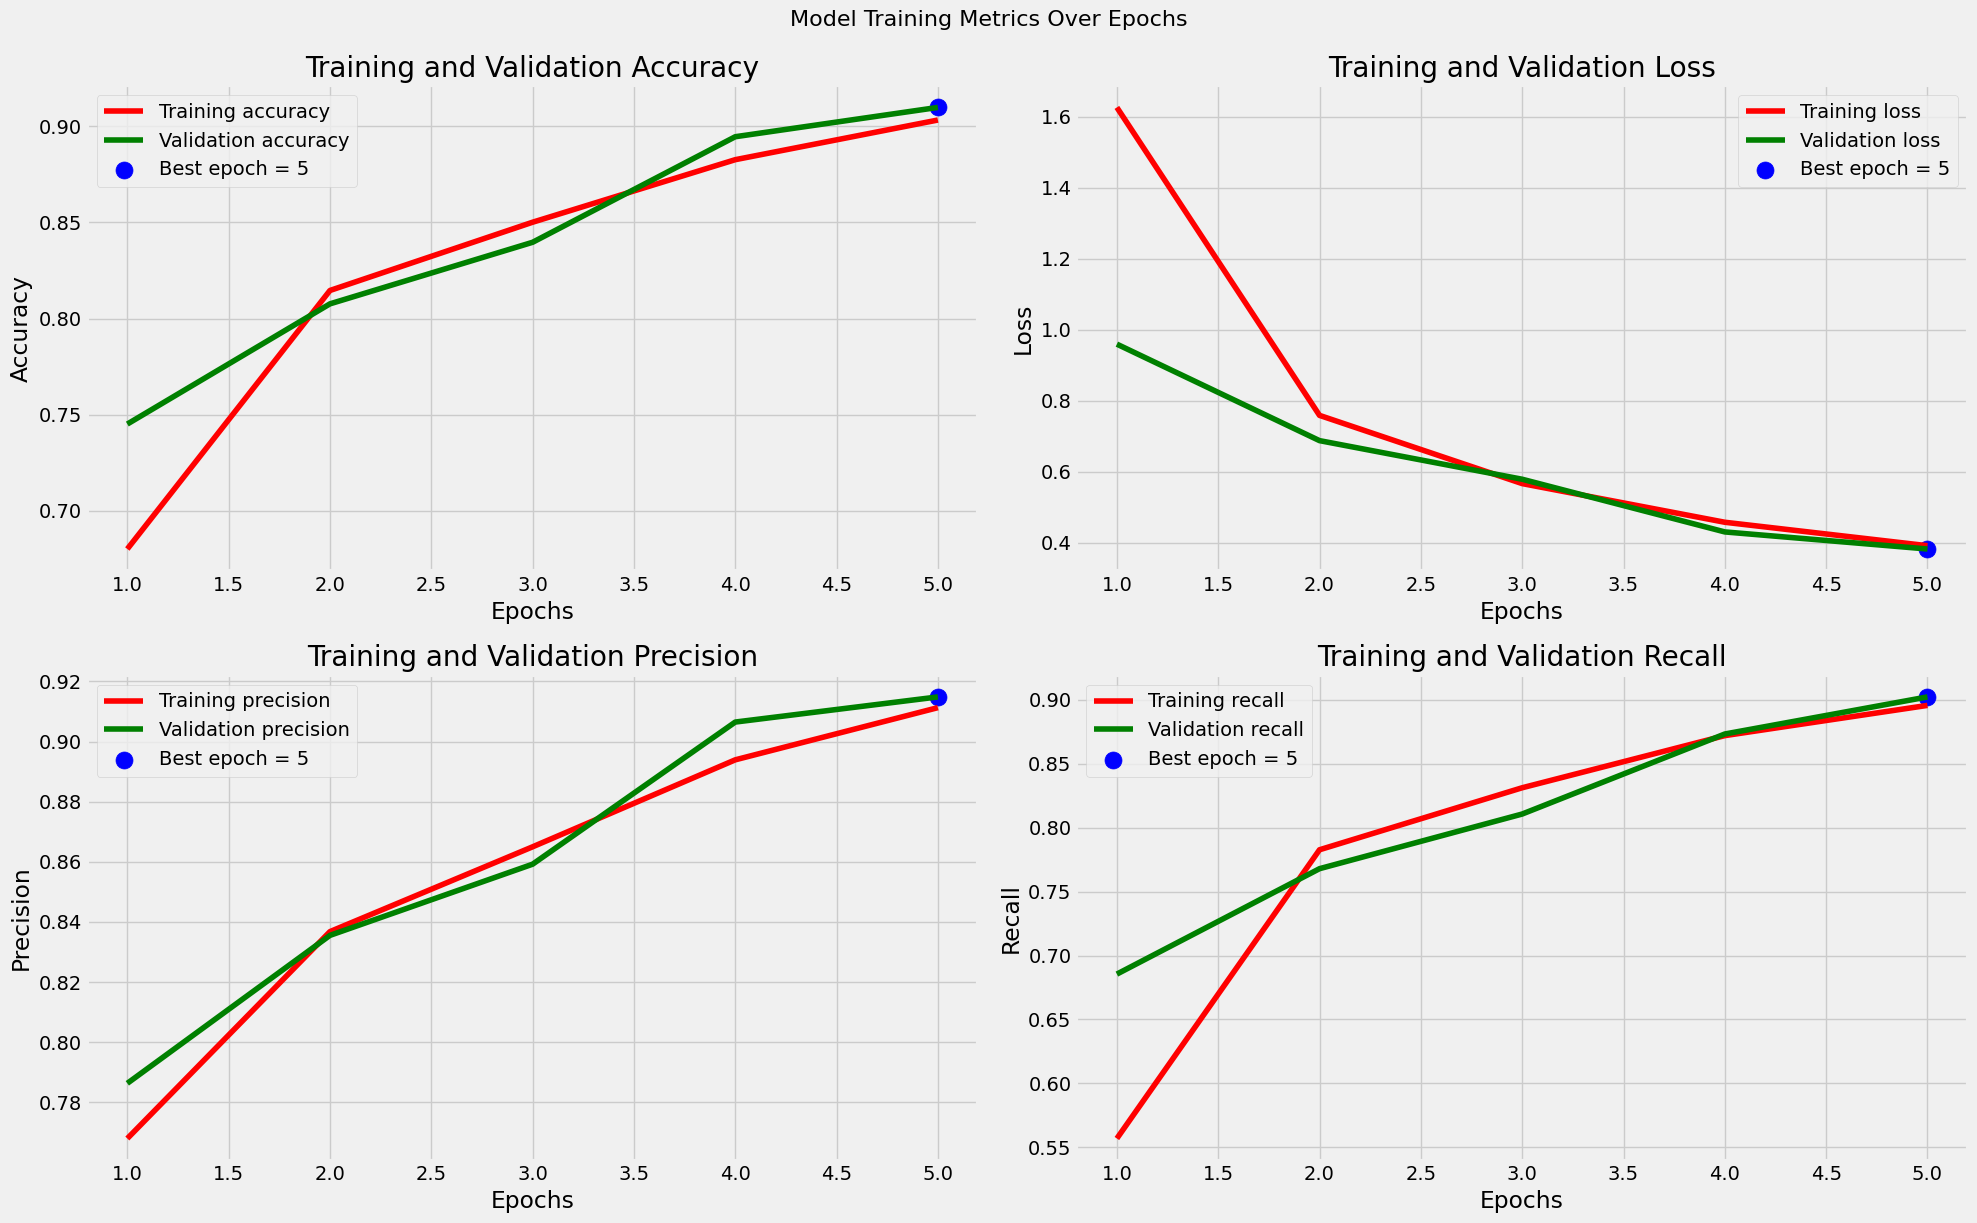

In [37]:
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)
    
    # Clean up metric names for display
    display_metric = metric.replace('_1', '')
    
    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {display_metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {display_metric}')
    # Fixed this line: changed best_epochs[metrics] to best_epochs[metric]
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', 
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {display_metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(display_metric.title())
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Model Training Metrics Over Epochs', fontsize=16, y=1.02)
plt.show()

### Train for longer? How to find optimal number of epochs. Total run time = 3 hr ~30 mins

In [38]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1] * 100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 613s 2s/step - accuracy: 0.9527 - loss: 0.2966 - precision_1: 0.9566 - recall_1: 0.9476
41/41 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9263 - loss: 0.3489 - precision_1: 0.9278 - recall_1: 0.9225


c:\Users\brian\VisualStudioCode\Projects\BrainTumorClassification\tensorflow_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9356 - loss: 0.3302 - precision_1: 0.9394 - recall_1: 0.9273
Train Accuracy: 95.22%
Train Loss: 0.2962


Validation Accuracy: 90.84%
Validation Loss: 0.3843


Test Accuracy: 91.46%
Test Loss: 0.3886


41/41 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step


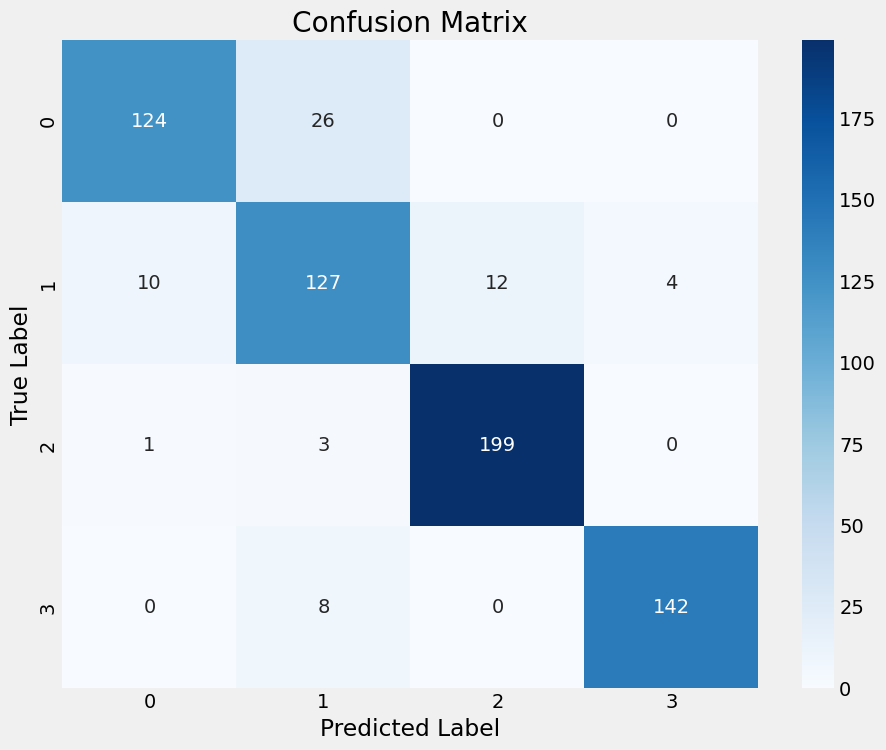

In [39]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [40]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       150
           1       0.77      0.83      0.80       153
           2       0.94      0.98      0.96       203
           3       0.97      0.95      0.96       150

    accuracy                           0.90       656
   macro avg       0.90      0.90      0.90       656
weighted avg       0.90      0.90      0.90       656



In [42]:
cnn_model.save("cnn_model.h5")

# Streamlit APP

In [44]:
! pip install streamlit pyngrok python-dotenv

  Using cached streamlit-1.40.1-py2.py3-none-any.whl (8.6 MB)
  Using cached pyngrok-7.2.1-py3-none-any.whl (22 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
  Using cached pyarrow-18.0.0-cp310-cp310-win_amd64.whl (25.1 MB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)
  Using cached altair-5.4.1-py3-none-any.whl (658 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
  Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl (79 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-win_amd64.whl (161 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
  Using cached narwhals-1.13.5-py3-none-any.whl (208 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached smmap-5.0

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\brian\\VisualStudioCode\\Projects\\BrainTumorClassification\\tensorflow_env\\Lib\\site-packages\\pyarrow\\tests\\parquet\\test_parquet_file.py'
Check the permissions.


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
from threading import Thread
from pyngrok import ngrok
import os
from dotenv import load_dotenv

In [88]:
load_dotenv()

True

In [89]:
ngrok_token = os.getenv("NGROK_AUTH_TOKEN")
ngrok.set_auth_token(ngrok_token)

In [90]:
def run_streamlit():
    os.system("streamlit run ./app.py --server.port 8501")

In [147]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
import PIL.Image
import os

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]
    
    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)
    
    # Superimpose the heatmap on original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    # Save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img, saliency_map_path

def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
The saliency map was generated by a deep learning model that was trained to classify brain tumors 
as either glioma, meningioma, pituitary, or no tumor.

The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

In your response:
- Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted 
in light cyan, those are the regions where the model is focusing on.
- Explain possible reasons why the model made the prediction it did.
- Don’t mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan' 
in your explanation.
- Keep your explanation to 4 sentences max.

Let's think step by step about this. Verify step by step.
"""
    img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])

    return response.text


output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify")

uploaded_file = st.file_uploader("Choose image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    selected_model = st.radio(
        "Select Model",
        ("Custom CNN")
    )

    if selected_model == "Custom CNN":
        model = load_model('./cnn_model.h5')
        img_size = (224, 224)

    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class: {result}")
    st.write("Predictions:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4f}")

    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)[0]
    col1, col2 = st.columns(2)
    with col1:
        st.image(uploaded_file, caption="Uploaded Image", use_container_width=True)
    with col2:
        st.image(saliency_map, caption="Saliency Map", use_container_width=True)

    saliency_map_path = generate_saliency_map(model, img_array, class_index, img_size)[1]
    explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

    st.write("## Classification Results")

    result_container = st.container()
    result_container = st.container()
    result_container.markdown(
        f"""
        <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
            <div style="display: flex; justify-content: space-between; align-items: center;">
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
                        {result}
                    </p>
                </div>
                <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                        {prediction[0][class_index]:.4%}
                    </p>
                </div>
            </div>
        </div>
        """,
        unsafe_allow_html=True
    )
    probabilities = prediction[0]
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    # Create a Plotly bar chart
    fig = go.Figure(go.Bar(
        x=sorted_probabilities,
        y=sorted_labels,
        orientation='h',
        marker_color=['red' if label == result else 'blue' for label in sorted_labels]
    ))

    # Customize the chart layout
    fig.update_layout(
        title='Probabilities for each class',
        xaxis_title='Probability',
        yaxis_title='Class',
        height=400,
        width=600,
        yaxis=dict(autorange='reversed')
    )

    # Add value labels to the bars
    for i, prob in enumerate(sorted_probabilities):
        fig.add_annotation(
            x=prob,
            y=i,
            text=f'{prob:.4f}',
            showarrow=False,
            xanchor='left',
            xshift=5
        )

    # Display the Plotly chart
    st.plotly_chart(fig)


    st.write("## Explanation")
    st.write(explanation)

Overwriting app.py


In [148]:
thread = Thread(target=run_streamlit)

thread.start()

In [149]:
public_url = ngrok.connect(addr='8501', proto="http", bind_tls=True)

print("Public URL: ", public_url)

Public URL:  NgrokTunnel: "https://8984-24-228-83-2.ngrok-free.app" -> "http://localhost:8501"


In [146]:
# Reset and close other tunnels

tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print("Closing tunnel :" , tunnel.public_url, tunnel.config['addr'])
    ngrok.disconnect(tunnel.public_url)

Closing tunnel : https://529a-24-228-83-2.ngrok-free.app http://localhost:8501
Closing tunnel : https://4275-24-228-83-2.ngrok-free.app http://localhost:8501
Closing tunnel : https://0291-24-228-83-2.ngrok-free.app http://localhost:8501
